# Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'
plt.rcParams['font.family'] = 'Helvetica'

In [53]:
dfs = {
    'vary_n_a': pd.read_csv("results/vary_n_a.csv", index_col=0),
    'vary_n_phi': pd.read_csv("results/vary_n_phi.csv", index_col=0),
    'vary_p': pd.read_csv("results/vary_p.csv", index_col=0),
    'vary_r': pd.read_csv("results/vary_r.csv", index_col=0),
}
for experiment in dfs:
    dfs[experiment][['ln_n', 'ln_TV_err_V', 'ln_TV_err_U', 'ln_TV_err_P', 'ln_TV_err_P_hat']] = np.log(dfs[experiment][['n', 'TV_err_V', 'TV_err_U', 'TV_err_P', 'TV_err_P_hat']])
dfs['vary_n_a']

,n,p,r,num_anchors,TV_err_V,TV_err_U,TV_err_P_hat,TV_err_P,L2_err_V,L2_err_U,L2_err_P_hat,L2_err_P,sim_time,decomp_time,trial,ln_n,ln_TV_err_V,ln_TV_err_U,ln_TV_err_P,ln_TV_err_P_hat
0,800000,1000,6,25,5.995107,319.896240,274.933832,141.828414,0.093105,27.424041,0.561374,0.188585,9.776125,2.710173,0,13.592367,1.790944,5.767997,4.954618,5.616530
1,800000,1000,6,25,6.738704,323.195344,272.739345,142.310073,0.106589,27.613826,0.556102,0.188755,9.805422,2.640029,1,13.592367,1.907868,5.778257,4.958008,5.608517
2,800000,1000,6,25,6.445304,290.190815,278.074218,140.335558,0.104729,22.071704,0.586205,0.189942,9.708019,2.648312,2,13.592367,1.863352,5.670539,4.944036,5.627888
3,800000,1000,6,25,6.439153,281.443219,272.667216,140.378987,0.101215,20.662142,0.548076,0.185494,9.770536,2.679565,3,13.592367,1.862397,5.639931,4.944346,5.608252
4,800000,1000,6,25,6.437429,295.253042,274.134073,139.421343,0.098803,22.582224,0.557436,0.183452,9.900830,2.690885,4,13.592367,1.862129,5.687833,4.937501,5.613617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,30000000,1000,6,10,0.166481,140.068202,193.949106,33.076334,0.000064,5.514744,0.340961,0.026199,360.575007,2.390999,0,17.216708,-1.792875,4.942129,3.498818,5.267596
116,30000000,1000,6,10,0.145304,140.724512,201.343575,33.196118,0.000050,5.505426,0.347310,0.027077,360.738511,2.253458,1,17.216708,-1.928927,4.946804,3.502433,5.305013
117,30000000,1000,6,10,0.155901,136.959403,193.670630,32.873160,0.000056,5.301567,0.338550,0.026750,361.914635,2.295851,2,17.216708,-1.858532,4.919685,3.492657,5.266159
118,30000000,1000,6,10,0.159105,135.738900,193.116319,32.661338,0.000058,5.186795,0.342241,0.025751,362.876497,2.377784,3,17.216708,-1.838194,4.910733,3.486192,5.263293


# Plots

## TV error V

25 -1.1098951040426068
50 -1.0144435952904125
75 -0.9353455636619852


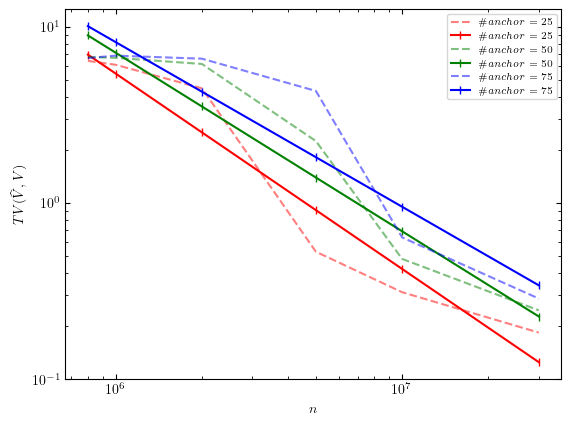

In [4]:
line_color = {
    25: 'red',
    50: 'green',
    75: 'blue'
}
df_ = dfs['vary_n_a'].query('num_anchors >= 25')
for num_anchors, subdf in df_.groupby('num_anchors'):
    params = sm.OLS(endog=subdf['ln_TV_err_V'], exog=sm.add_constant(subdf['ln_n'])).fit().params
    # Print coefficient
    print(num_anchors, params['ln_n'])
    subdf = subdf.groupby('n').mean()
    plt.plot(subdf.index, subdf['TV_err_V'], linestyle='--', label=f'$\\#anchor = {num_anchors}$', zorder=0, color=line_color[num_anchors], alpha=0.5)
    plt.plot(subdf.index, np.exp(params['const'] + params['ln_n'] * subdf['ln_n']), marker='|', label=f'$\\#anchor = {num_anchors}$', zorder=0, color=line_color[num_anchors])
    # plt.scatter(subdf.index, np.exp(params['const'] + params['ln_n']*np.log(subdf.index)), color='black', zorder=1)
plt.tick_params(which='both', direction='in', top=True, right=True)
plt.xscale('log')
plt.xlabel('$n$')
plt.yscale('log')
plt.ylabel('$TV(\\widehat{V},V)$')
plt.legend(fontsize='x-small')
plt.savefig('figures/fig1b.png')
plt.show()

## TV error P

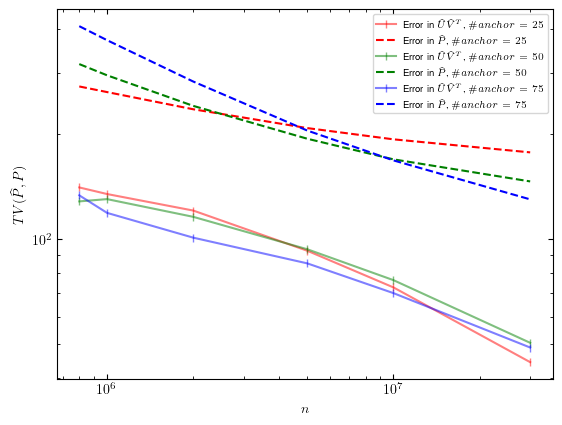

In [5]:
line_color = {
    25: 'red',
    50: 'green',
    75: 'blue'
}
df_ = dfs['vary_n_a'].query('num_anchors >= 25')
for num_anchors, subdf in df_.groupby('num_anchors'):
    subdf = subdf.groupby('n').mean()
    plt.plot(subdf.index, subdf['TV_err_P'], marker='|', label='Error in $\\widehat{U}\\widehat{V}^T$, '+f'$\\#anchor = {num_anchors}$', zorder=0, color=line_color[num_anchors], alpha=0.5)
    plt.plot(subdf.index, subdf['TV_err_P_hat'], linestyle='--', label='Error in $\\widehat{P}$, '+f'$\\#anchor = {num_anchors}$', zorder=0, color=line_color[num_anchors])
plt.tick_params(which='both', direction='in', top=True, right=True)
plt.xscale('log')
plt.xlabel('$n$')
plt.yscale('log')
plt.ylabel("$TV(\\widehat{P},P)$")
plt.legend(fontsize='x-small')
plt.savefig('figures/fig2b.png')
plt.show()

## TV error U

25 -0.23372253582102315
50 -0.2988026408160878
75 -0.3056066332898748


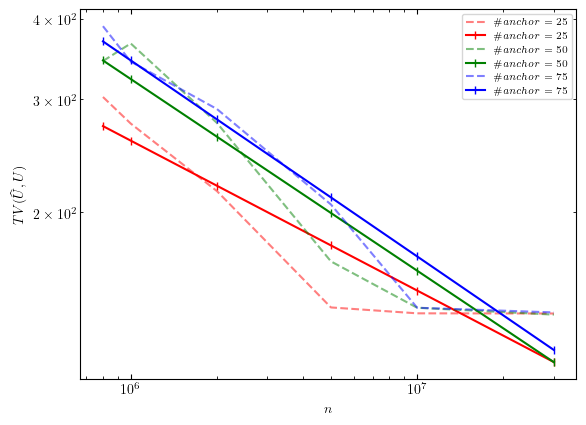

In [6]:
line_color = {
    25: 'red',
    50: 'green',
    75: 'blue'
}
df_ = dfs['vary_n_a'].query('num_anchors >= 25')
for num_anchors, subdf in df_.groupby('num_anchors'):
    params = sm.OLS(endog=subdf['ln_TV_err_U'], exog=sm.add_constant(subdf['ln_n'])).fit().params
    # Print coefficient
    print(num_anchors, params['ln_n'])
    subdf = subdf.groupby('n').mean()
    plt.plot(subdf.index, subdf['TV_err_U'], linestyle='--', label=f'$\\#anchor = {num_anchors}$', zorder=0, color=line_color[num_anchors], alpha=0.5)
    plt.plot(subdf.index, np.exp(params['const'] + params['ln_n'] * subdf['ln_n']), marker='|', label=f'$\\#anchor = {num_anchors}$', zorder=0, color=line_color[num_anchors])
    # plt.scatter(subdf.index, np.exp(params['const'] + params['ln_n']*np.log(subdf.index)), color='black', zorder=1)
plt.tick_params(which='both', direction='in', top=True, right=True)
plt.xscale('log')
plt.xlabel('$n$')
plt.yscale('log')
plt.ylabel('$TV(\\widehat{U},U)$')
plt.legend(fontsize='x-small')
plt.savefig('figures/fig3.png')
plt.show()

## Algorithm Runtime

1.219445853798086e-05


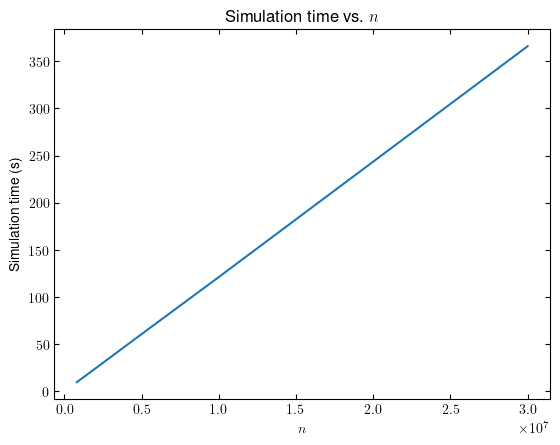

In [78]:
# Runtime of algorithm
df_ = dfs['vary_n_a']
params = sm.OLS(endog=df_['sim_time'], exog=sm.add_constant(df_['n'])).fit().params
print(params['n'])
df_ = df_.groupby('n').mean()['sim_time']
plt.plot(df_.index, df_, alpha=1)
plt.tick_params(which='both', direction='in', top=True, right=True)
plt.xlabel('$n$')
plt.ylabel('Simulation time (s)')
plt.title("Simulation time vs. $n$")
plt.subplots_adjust(wspace=.2, hspace=0.2)
plt.savefig('figures/fig_sim_n.png')
plt.show()

9.838682395219803e-06


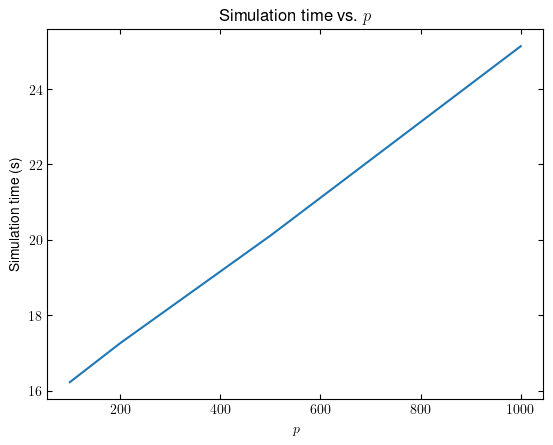

In [77]:
# Runtime of algorithm
line_color = {
    25: 'red',
    50: 'green',
    75: 'blue'
}
df_ = dfs['vary_p']
params = sm.OLS(endog=df_['sim_time'], exog=sm.add_constant(df_['n'])).fit().params
print(params['n'])
df_ = df_.groupby('p').mean()['sim_time']
plt.plot(df_.index, df_, alpha=1)
# plt.plot(subdf.index, np.exp(params['const'] + params['ln_n'] * subdf['ln_n']), marker='|', label=f'$\\#anchor = {num_anchors}$', zorder=0, color=line_color[num_anchors])
plt.tick_params(which='both', direction='in', top=True, right=True)
plt.xlabel('$p$')
plt.ylabel('Simulation time (s)')
plt.title("Simulation time vs. $p$")
plt.subplots_adjust(wspace=.2, hspace=0.2)
plt.savefig('figures/fig_sim_p.png')
plt.show()

-7.211178245050276e-09
0.002917317152023316
0.36911455563136497
0.0021451030758478816


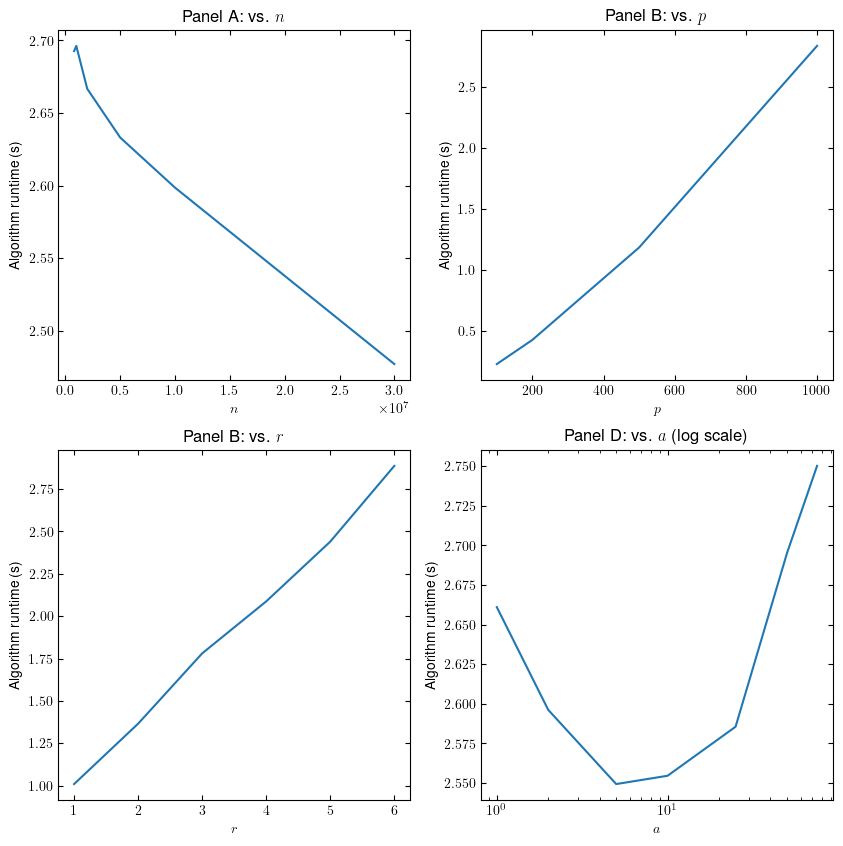

In [75]:
# Runtime of algorithm
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 10))

df_ = dfs['vary_n_a']
params = sm.OLS(endog=df_['decomp_time'], exog=sm.add_constant(df_['n'])).fit().params
print(params['n'])
df_ = df_.groupby('n').mean()['decomp_time']
ax1.plot(df_.index, df_)
ax1.tick_params(which='both', direction='in', top=True, right=True)
ax1.set_xlabel('$n$')
ax1.set_ylabel('Algorithm runtime (s)')
ax1.set_title("Panel A: vs. $n$")

df_ = dfs['vary_p']
params = sm.OLS(endog=df_['decomp_time'], exog=sm.add_constant(df_['p'])).fit().params
print(params['p'])
df_ = df_.groupby('p').mean()['decomp_time']
ax2.plot(df_.index, df_)
ax2.tick_params(which='both', direction='in', top=True, right=True)
ax2.set_xlabel('$p$')
ax2.set_ylabel('Algorithm runtime (s)')
ax2.set_title("Panel B: vs. $p$")

df_ = dfs['vary_r']
params = sm.OLS(endog=df_['decomp_time'], exog=sm.add_constant(df_['r'])).fit().params
print(params['r'])
df_ = df_.groupby('r').mean()['decomp_time']
ax3.plot(df_.index, df_)
ax3.tick_params(which='both', direction='in', top=True, right=True)
ax3.set_xlabel('$r$')
ax3.set_ylabel('Algorithm runtime (s)')
ax3.set_title("Panel B: vs. $r$")

df_ = dfs['vary_n_a']
params = sm.OLS(endog=df_['decomp_time'], exog=sm.add_constant(df_['num_anchors'])).fit().params
print(params['num_anchors'])
df_ = df_.groupby('num_anchors').mean()['decomp_time']
ax4.plot(df_.index, df_)
ax4.tick_params(which='both', direction='in', top=True, right=True)
ax4.set_xlabel('$a$')
ax4.set_xscale('log')
ax4.set_ylabel('Algorithm runtime (s)')
ax4.set_title("Panel D: vs. $a$ (log scale)")

plt.subplots_adjust(wspace=.2, hspace=0.2)
plt.savefig('figures/fig_decomp.png', bbox_inches='tight')
plt.show()

## L2 error

25 -2.328039987391679
50 -2.0239352507941666
75 -1.847890437248362
25 -0.4448151912188319
50 -0.5741346795534352
75 -0.5932628609269943


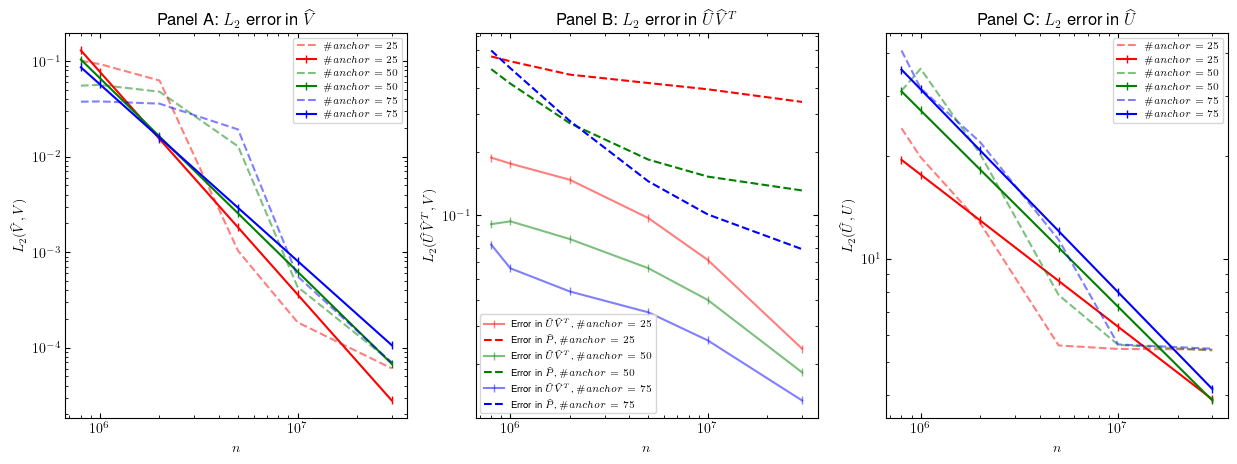

In [92]:
# L2 error
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
df_ = dfs['vary_n_a'].query('num_anchors >= 25')

for num_anchors, subdf in df_.groupby('num_anchors'):
    params = sm.OLS(endog=np.log(subdf['L2_err_V']), exog=sm.add_constant(subdf['ln_n'])).fit().params
    # Print coefficient
    print(num_anchors, params['ln_n'])
    subdf = subdf.groupby('n').mean()
    ax1.plot(subdf.index, subdf['L2_err_V'], linestyle='--', label=f'$\\#anchor = {num_anchors}$', zorder=0, color=line_color[num_anchors], alpha=0.5)
    ax1.plot(subdf.index, np.exp(params['const'] + params['ln_n'] * subdf['ln_n']), marker='|', label=f'$\\#anchor = {num_anchors}$', zorder=0, color=line_color[num_anchors])
ax1.tick_params(which='both', direction='in', top=True, right=True)
ax1.set_xscale('log')
ax1.set_xlabel('$n$')
ax1.set_yscale('log')
ax1.set_ylabel('$L_2(\\widehat{V},V)$')
ax1.set_title("Panel A: $L_2$ error in $\\widehat{V}$")
ax1.legend(fontsize='x-small')

for num_anchors, subdf in df_.groupby('num_anchors'):
    subdf = subdf.groupby('n').mean()
    ax2.plot(subdf.index, subdf['L2_err_P'], marker='|', label='Error in $\\widehat{U}\\widehat{V}^T$, '+f'$\\#anchor = {num_anchors}$', zorder=0, color=line_color[num_anchors], alpha=0.5)
    ax2.plot(subdf.index, subdf['L2_err_P_hat'], linestyle='--', label='Error in $\\widehat{P}$, '+f'$\\#anchor = {num_anchors}$', zorder=0, color=line_color[num_anchors])
ax2.tick_params(which='both', direction='in', top=True, right=True)
ax2.set_xscale('log')
ax2.set_xlabel('$n$')
ax2.set_yscale('log')
ax2.set_ylabel('$L_2(\\widehat{U}\\widehat{V}^T,V)$')
ax2.set_title("Panel B: $L_2$ error in $\\widehat{U}\\widehat{V}^T$")
ax2.legend(fontsize='x-small')

for num_anchors, subdf in df_.groupby('num_anchors'):
    params = sm.OLS(endog=np.log(subdf['L2_err_U']), exog=sm.add_constant(subdf['ln_n'])).fit().params
    print(num_anchors, params['ln_n'])
    subdf = subdf.groupby('n').mean()
    ax3.plot(subdf.index, subdf['L2_err_U'], linestyle='--', label=f'$\\#anchor = {num_anchors}$', zorder=0, color=line_color[num_anchors], alpha=0.5)
    ax3.plot(subdf.index, np.exp(params['const'] + params['ln_n'] * subdf['ln_n']), marker='|', label=f'$\\#anchor = {num_anchors}$', zorder=0, color=line_color[num_anchors])
ax3.tick_params(which='both', direction='in', top=True, right=True)
ax3.set_xscale('log')
ax3.set_xlabel('$n$')
ax3.set_yscale('log')
ax3.set_ylabel('$L_2(\\widehat{U},U)$')
ax3.set_title("Panel C: $L_2$ error in $\\widehat{U}$")
ax3.legend(fontsize='x-small')
plt.subplots_adjust(wspace=.2, hspace=0.2)
plt.savefig('figures/fig_l2.png', bbox_inches='tight')
plt.show()

## Anchor prob

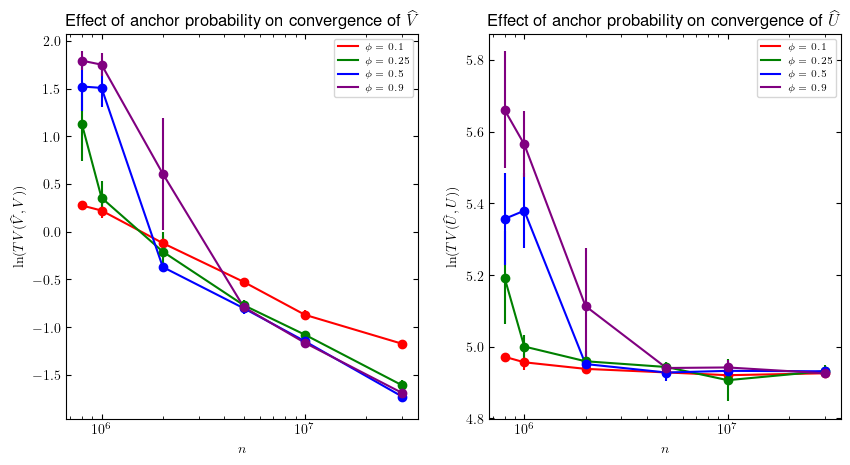

In [9]:
# Effect of anchor_prob
line_color = {
    .1: 'red',
    .25: 'green',
    .5: 'blue',
    .9: 'purple'
}
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
for anchor_prob, subdf in dfs['vary_n_phi'].groupby('anchor_prob'):
    y_str = 'ln_TV_err_V'
    subdf = subdf.groupby('n').agg({y_str: ['mean', 'std']})[y_str].reset_index()
    ax1.plot(subdf['n'], subdf['mean'], color=line_color[anchor_prob], label=f'$\\phi={anchor_prob}$')
    ax1.errorbar(subdf['n'], subdf['mean'], yerr=subdf['std'], fmt='o', color=line_color[anchor_prob])
ax1.legend(fontsize='x-small')
ax1.tick_params(which='both', direction='in', top=True, right=True)
ax1.set_xlabel('$n$')
ax1.set_xscale('log')
ax1.set_ylabel('$\\ln(TV(\\widehat{V},V))$')
ax1.set_title('Effect of anchor probability on convergence of $\\widehat{V}$')

for anchor_prob, subdf in dfs['vary_n_phi'].groupby('anchor_prob'):
    y_str = 'ln_TV_err_U'
    subdf = subdf.groupby('n').agg({y_str: ['mean', 'std']})[y_str].reset_index()
    ax2.plot(subdf['n'], subdf['mean'], color=line_color[anchor_prob], label=f'$\\phi={anchor_prob}$')
    ax2.errorbar(subdf['n'], subdf['mean'], yerr=subdf['std'], fmt='o', color=line_color[anchor_prob])
ax2.legend(fontsize='x-small')
ax2.tick_params(which='both', direction='in', top=True, right=True)
ax2.set_xlabel('$n$')
ax2.set_xscale('log')
ax2.set_ylabel('$\\ln(TV(\\widehat{U},U))$')
ax2.set_title('Effect of anchor probability on convergence of $\\widehat{U}$')
plt.savefig('figures/fig4.png')
plt.show()

## Number anchors

1 -0.5233515544034161
2 -0.6263799814910763
5 -0.6615945303638997
10 -0.9307361508790575
25 -1.1098951040426068
50 -1.0144435952904125
75 -0.9353455636619852
1 -0.1610121531456407
2 -0.05220963752017166
5 -0.0581480404686196
10 -0.12355985392490831
25 -0.23372253582102315
50 -0.2988026408160878
75 -0.3056066332898748


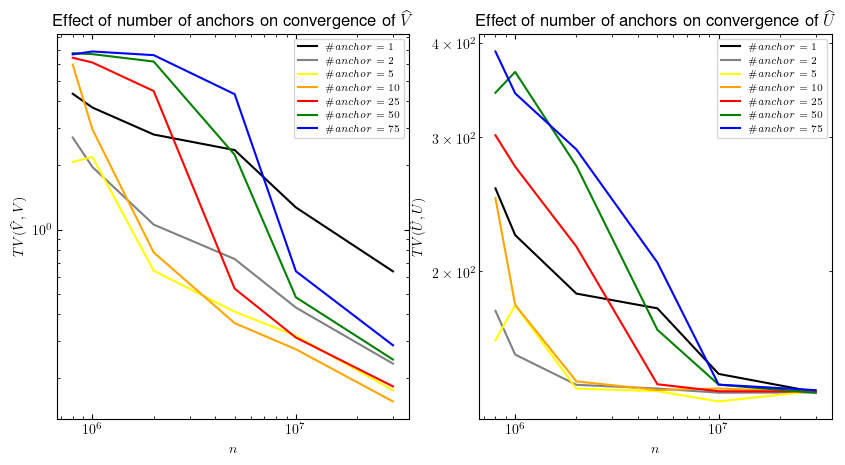

In [10]:
line_color = {
    1: 'black',
    2: 'gray',
    5: 'yellow',
    10: 'orange',
    25: 'red',
    50: 'green',
    75: 'blue'
}
df_ = dfs['vary_n_a']
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
for num_anchors, subdf in df_.groupby('num_anchors'):
    params = sm.OLS(endog=subdf['ln_TV_err_V'], exog=sm.add_constant(subdf['ln_n'])).fit().params
    # Print coefficient
    print(num_anchors, params['ln_n'])
    subdf = subdf.groupby('n').mean()
    ax1.plot(subdf.index, subdf['TV_err_V'], label=f'$\\#anchor = {num_anchors}$', zorder=0, color=line_color[num_anchors], alpha=1)
    # ax1.plot(subdf.index, np.exp(params['const'] + params['ln_n'] * subdf['ln_n']), marker='|', label=f'$\\#anchor = {num_anchors}$', zorder=0, color=line_color[num_anchors])
ax1.legend(fontsize='x-small')
ax1.tick_params(which='both', direction='in', top=True, right=True)
ax1.set_xscale('log')
ax1.set_xlabel('$n$')
ax1.set_yscale('log')
ax1.set_ylabel('$TV(\\widehat{V},V)$')
ax1.set_title('Effect of number of anchors on convergence of $\\widehat{V}$')

for num_anchors, subdf in df_.groupby('num_anchors'):
    params = sm.OLS(endog=subdf['ln_TV_err_U'], exog=sm.add_constant(subdf['ln_n'])).fit().params
    # Print coefficient
    print(num_anchors, params['ln_n'])
    subdf = subdf.groupby('n').mean()
    ax2.plot(subdf.index, subdf['TV_err_U'], label=f'$\\#anchor = {num_anchors}$', zorder=0, color=line_color[num_anchors], alpha=1)
    # ax2.plot(subdf.index, np.exp(params['const'] + params['ln_n'] * subdf['ln_n']), marker='|', label=f'$\\#anchor = {num_anchors}$', zorder=0, color=line_color[num_anchors])
ax2.legend(fontsize='x-small')
ax2.tick_params(which='both', direction='in', top=True, right=True)
ax2.set_xscale('log')
ax2.set_xlabel('$n$')
ax2.set_yscale('log')
ax2.set_ylabel('$TV(\\widehat{U},U)$')
ax2.set_title('Effect of number of anchors on convergence of $\\widehat{U}$')
plt.savefig('figures/fig5.png')
plt.show()